## Goals
In this lab you will:
- Learn to implement the model $f_{w,b}$ for linear regression with one variable

### Notations
- $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
- $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars)).  | `y_train` 
- $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
- m | Number of training examples | `m`|
- $w$  |  parameter: weight,                                 | `w`    |
- $b$           |  parameter: bias                                           | `b`    |     
- $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 

## Problem Statement
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')

# x_train is the input variable (feature)
# y_train is the target
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


### Number of Training Examples `m`

`m` is used to denote the number of training examples. 

Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [7]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is (numpy): {m}")

# alson len() can be used
m = len(x_train)
print(f"Number of training examples is (len): {m}")

x_train.shape: (2,)
Number of training examples is (numpy): 2
Number of training examples is (len): 2


### Training Example `x_i`, `y_i`
You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.

In [9]:
i = m

for num in range(i):
    x_i = x_train[num]
    y_i = y_train[num]
    print(f"(x^({num}), y^({num})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)
(x^(1), y^(1)) = (2.0, 500.0)


### Plotting Data
You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker`(e.g. dot, round) and `c`(color) show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

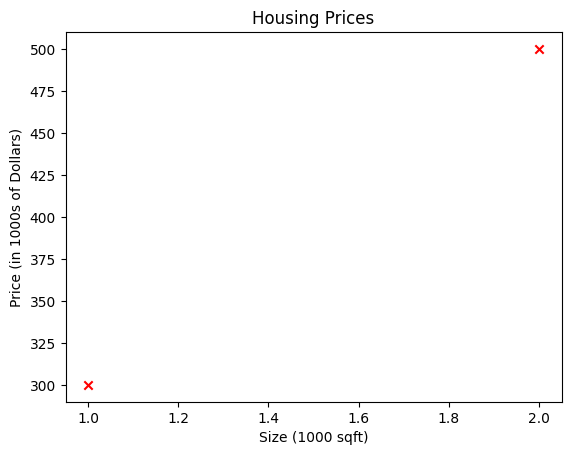

In [10]:
# plot the data points
plt.scatter(x_train,y_train, marker='x', c='r')
# set the title
plt.title("Housing Prices")
# set y axis label
plt.ylabel("Price (in 1000s of Dollars)")
# set x axis label
plt.xlabel("Size (1000 sqft)")
# showing plot
plt.show()

## Model Function
The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

In [11]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for the two data points.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries  

In [30]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
      f_wb[i]=w * x[i] + b

    return f_wb

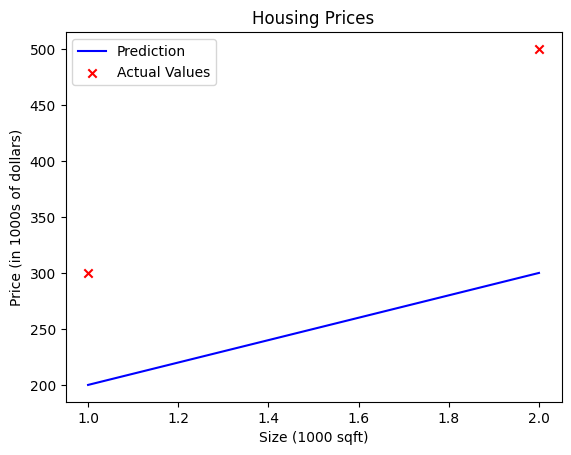

In [33]:
tmp_f_wb = compute_model_output(x_train,w,b)

# plot model prediction
# plot() connects points with lines.
plt.plot(x_train, tmp_f_wb, c='b', label='Prediction')

# plot data points
# scatter() just shows individual points, no lines.
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# set the title
plt.title("Housing Prices")

# set y-axis label
plt.ylabel('Price (in 1000s of dollars)')

# Set the x-axis label
plt.xlabel('Size (1000 sqft)')

plt.legend()
plt.show()

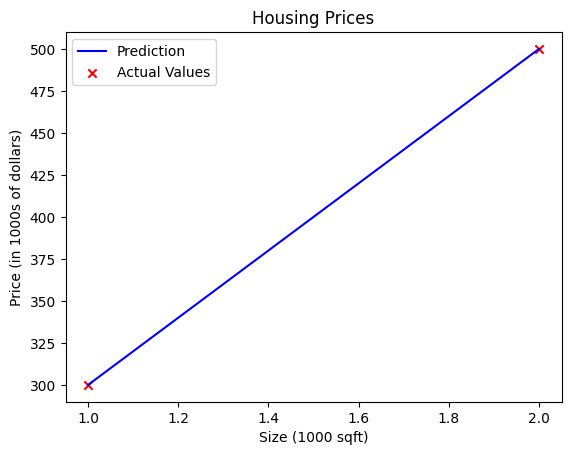

In [34]:
w = 200
b = 100
tmp_f_wb = compute_model_output(x_train,w,b)

# plot model prediction
# plot() connects points with lines.
plt.plot(x_train, tmp_f_wb, c='b', label='Prediction')

# plot data points
# scatter() just shows individual points, no lines.
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# set the title
plt.title("Housing Prices")

# set y-axis label
plt.ylabel('Price (in 1000s of dollars)')

# Set the x-axis label
plt.xlabel('Size (1000 sqft)')

plt.legend()
plt.show()

## Prediction

Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of  are in 1000's of sqft,  is 1.2.

In [37]:
def predict_from_model(w,x,b):
    prediction = w * x + b
    return prediction

x = 1.2
print(f"Price: ${predict_from_model(w, x, b)} thousand dollers")

Price: $340.0 thousand dollers


- Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was house size and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.